In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

1] There are 200 rows or datapoint  and  05 columns/variable  in dataset.

2] Unnamed column is showing index for datapoints .Hence it can be removed .

3] TV column,radio,newspaper  is sales expenditures on TV channels,radio channels.

4] Sales column is total sales generated by all channel .This is  Target variable.

5] It is predicted by model .



* Descriptive Statistics of Feature

In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


* Dropping iirelevent variable .

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 4)

* Descriptive statisctics of updated Dataframe

In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


1] TV Channel Observations :

    1] Average Sales with TV channel is 147.0425
    
    2] Minimum Sales with TV channel is 0.7
    
    3] Maximum Sales with TV channel is 296.4
____________________________________________________________
2] radio Channel Observations :

    1] Average Sales with radio channel is 23.264000000000024 
    
    2] Minimum Sales with radio channel is 0.0
    
    3] Maximum Sales with radio channel is 49.6
____________________________________________________________
3] newspaper Channel Observations :
    
    1] Average Sales with newspaper channel is 30.553999999999995 
    
    2] Minimum Sales with newspaper channel is 0.3
    
    3] Maximum Sales with newspaper channel is 114.0
____________________________________________________________
4] sales Channel Observations :
    
    1] Average Sales with sales channel is 14.022500000000003 
    
    2] Minimum Sales with sales channel is 1.6
    
    3] Maximum Sales with sales channel is 27.0
____________________________________________________________

5] There are not missing values in dataset
______________________________________________________________

* Graphical representation for Descriptive statistics 

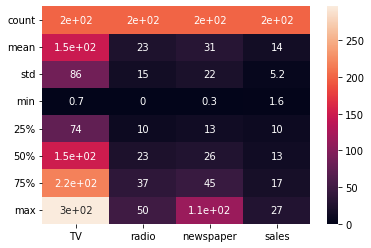

In [9]:
fig1=plt.figure()
sns.heatmap(df.describe(),annot=True)
fig1.savefig(" Descriptive statistics of Advertising Sales Dataset")
plt.show()

* Analysis of NAN in Variables.

In [10]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
df.isna().sum().sum()

0

In [12]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

* Graphical Representation of NaN analysis

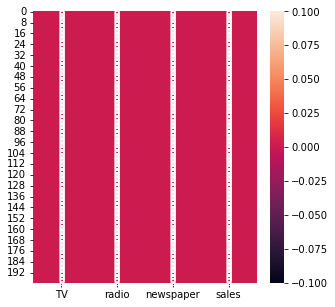

In [13]:
fig2=plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),annot=True)
plt.show()

* There are no NAN's present in Dataset.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


* ALL feature are continuous in nature.

* Analysing the Distribution of all feature.

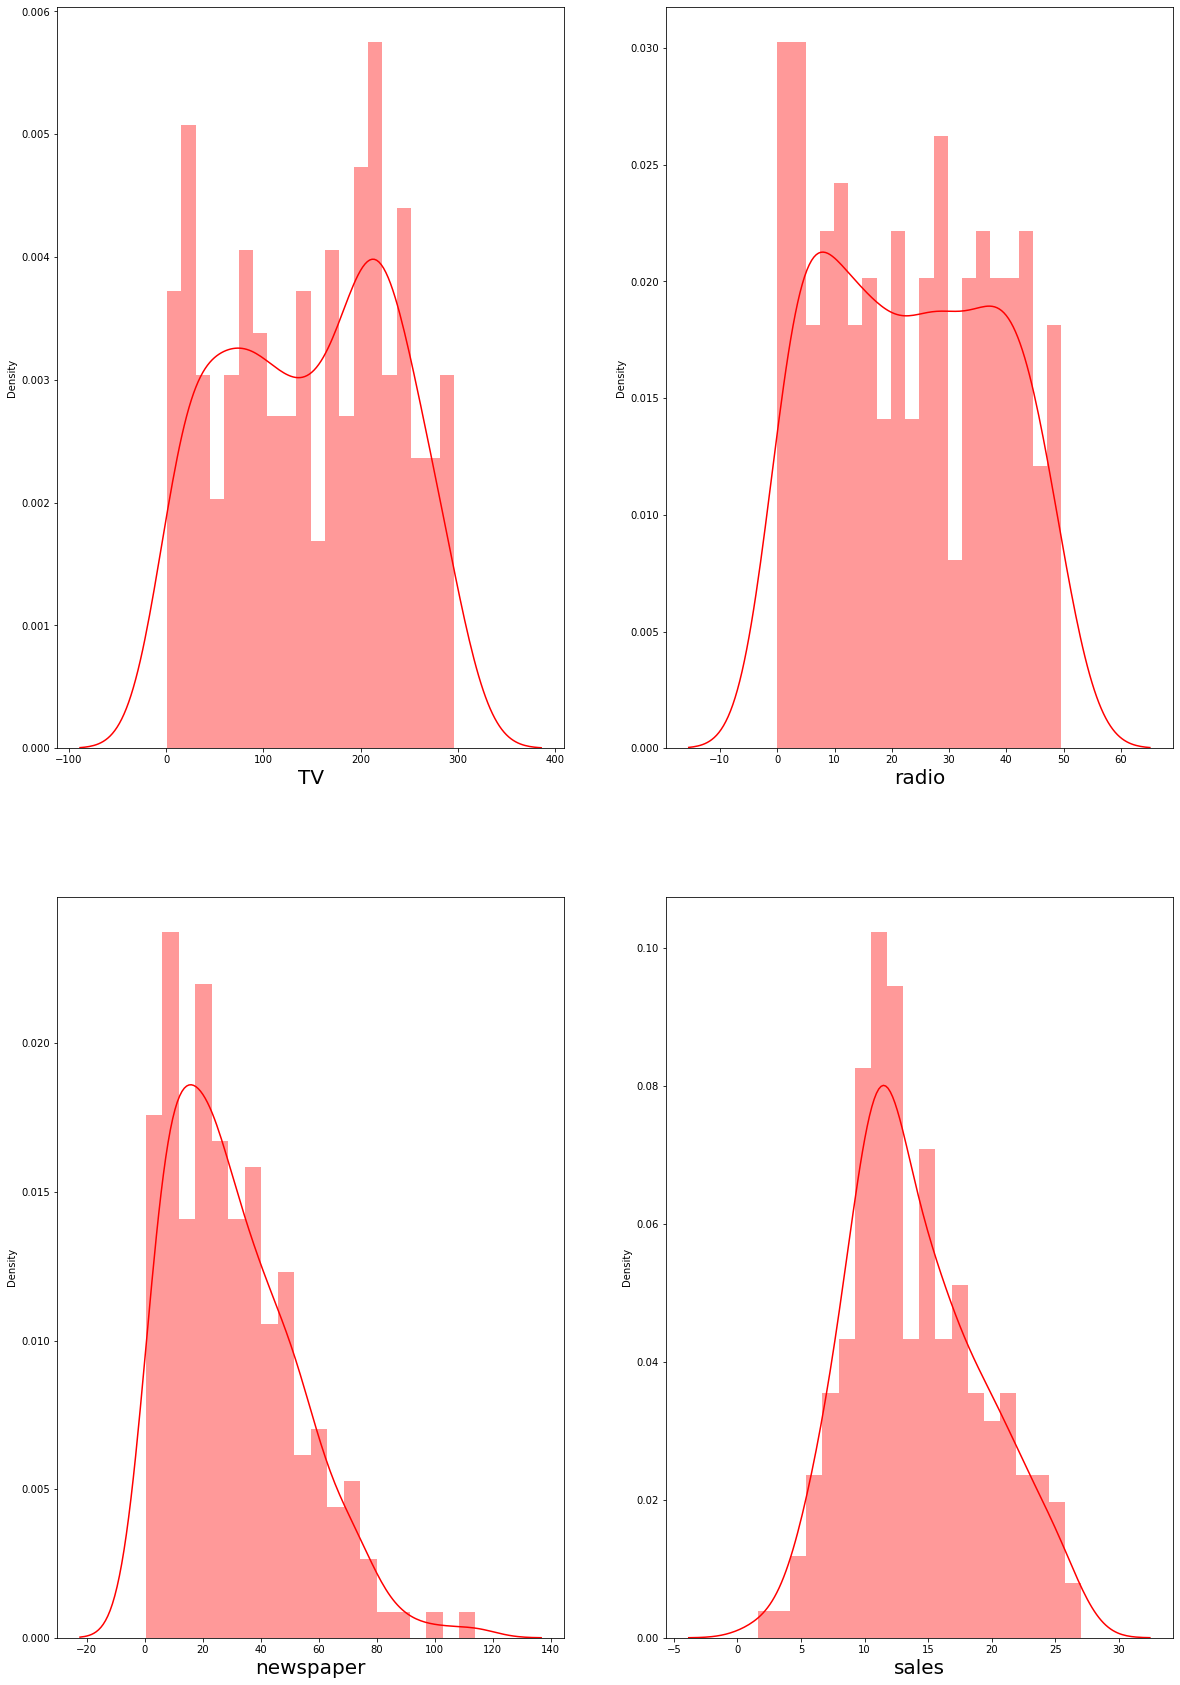

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in df.columns:
    if graph<=4:
        ax=plt.subplot(2,2,graph)
        sns.distplot(df[column],bins=20,kde=True,color='red')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

* kdeplot for Variable  distribution

1] TV feature and radio feature showing somewhatuniform distribution.

2] newspaper feature is right skewed.

3] sales target is uniformly distributed .


In [16]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<AxesSubplot:>

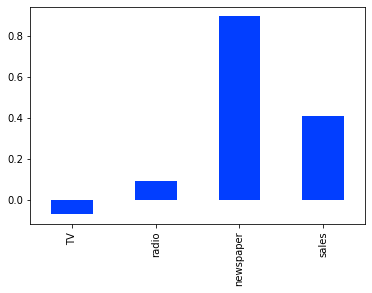

In [17]:
df.skew().plot(kind='bar',)

1] Threshold for skewness is 0.5 

2] TV feature has sekewness 0.06 so it  is somewhat uniform in nature NO need to remove skewness.

3] Radio feature has skewness 0.09 , which can also be considered as uniform.

4] Newspaper feature is highly skew with 0.89 where it is fequired to emove skewness .

# Outliers detection with boxplot.

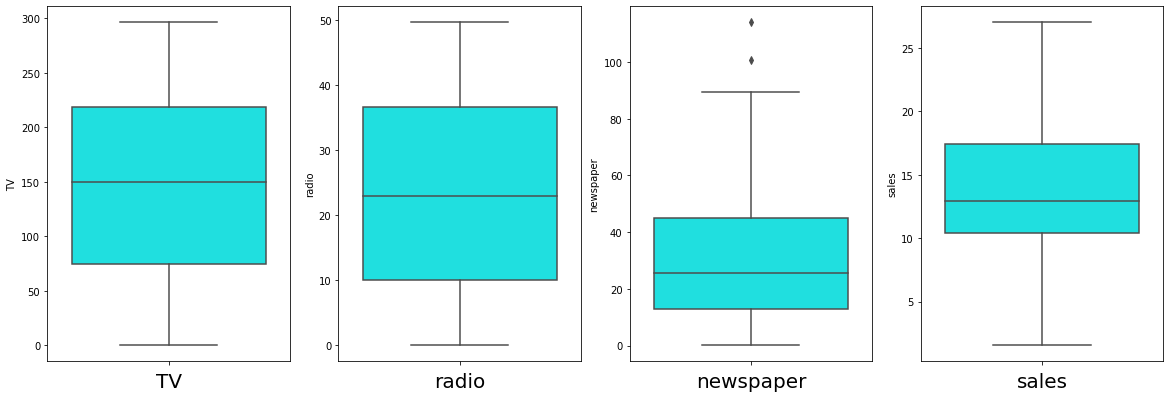

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(20,30))
sns.set_palette('pastel')
graph=1

for column in df.columns:
    if graph<=4:
        sns.boxplot(y=df[column],color='cyan',ax=plt.subplot(4,4,graph))
        plt.xlabel(column,fontsize=20)
                
    graph+=1
plt.show()
plt.tight_layout()

1] TV and radio feature have no outliers as observed from above graph.

2] newspaper has detected two datapoints as outliers which can be remove.


# Analyse outliers detection  by IQR  method.

In [19]:
df1=df.drop('sales',axis=1).copy()  # new dataset with copyng df

print(df1.shape)
df1.head()

(200, 3)


,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [20]:
# rows before outliers removal
rows_before =df1.shape[0]
rows_before

200

In [21]:
q1=df1.quantile(0.25)
q3=df1.quantile(0.75)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
Quant=pd.DataFrame({'Q1':q1,'Q3':q3,'IQR':iqr,'Lower limit':lower,'Upper limit':upper})
Quant

,Q1,Q3,IQR,Lower limit,Upper limit
TV,74.375,218.825,144.45,-142.300,435.500
radio,9.975,36.525,26.55,-29.850,76.350
newspaper,12.750,45.100,32.35,-35.775,93.625


In [22]:
for i in df1.columns:
    ind=np.where(df1[i]>upper[i])
    df1=df1.drop(df1.index[ind])
    df1.reset_index()
    
for i in df1.columns:
    inx=np.where(df1[i]<lower[i])
    df1=df1.drop(df1.index[inx])
    df1.reset_index()

In [23]:
df1.shape

(198, 3)

In [24]:
rows_after=df1.shape[0]
rows_after

198

In [25]:
loss1=((rows_before-rows_after)/rows_before)*100
loss1

1.0

* data loss with iqr method is 1 %., which accepatble.

# Analyse outliers detection  by zscore  method.

In [26]:
df2=df.drop('sales',axis=1).copy()
df2.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [27]:
df2.shape[0]

200

In [28]:
rows_before_z=df2.shape[0]
rows_before_z

200

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df2)) # Outlier detection  only for continuous feature 
df2=df2[(z<=3).all(axis=1)] # apply this on all dataset values so that count of all feature wil be equal


In [30]:
rows_after_z=df2.shape[0]
rows_after_z

198

In [31]:
loss2=((rows_before_z-rows_after_z)/rows_before_z)*100
loss2

1.0

* Data loss with zscore is also 1 % so we will go trhough zscore.

In [32]:
z=np.abs(zscore(df[['TV','radio','newspaper']])) # Outlier detection  only for continuous feature 
df=df[(z<=3).all(axis=1)]


In [33]:
df.reset_index()

,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5


In [34]:
df.shape

(198, 4)

# Multivariate Analysis with correlation and scatterplot.

In [35]:
feat=['TV',"radio",'newspaper']

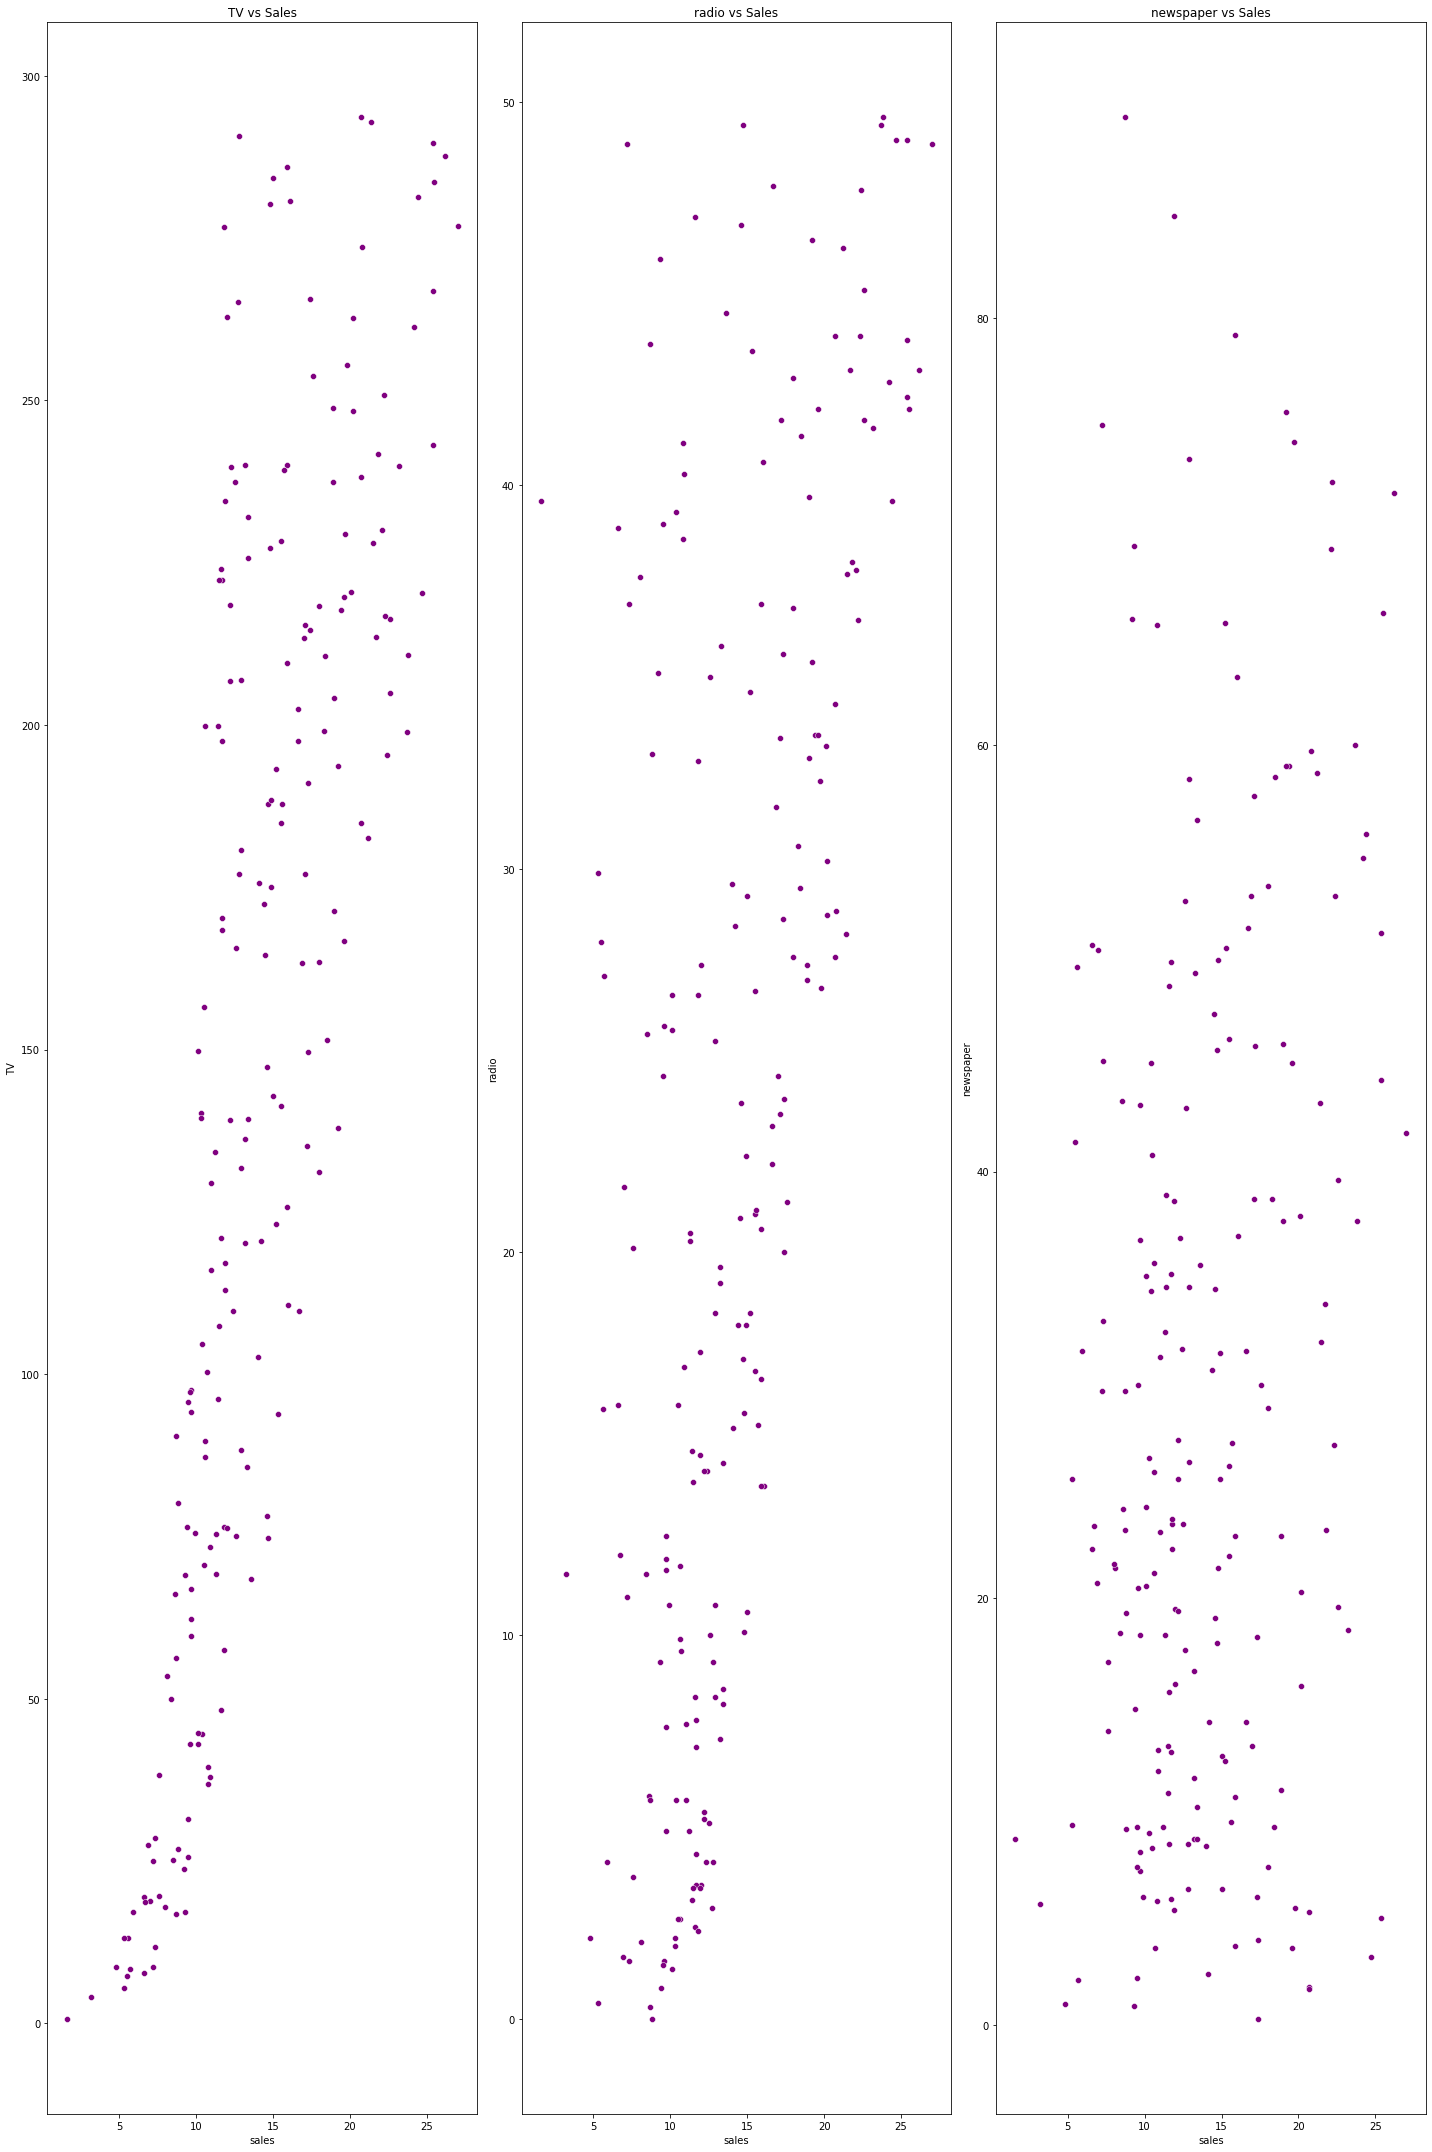

In [36]:
fig=plt.figure(figsize=(20,30))
j=1
for i in feat:
    if j<=3:
        sns.scatterplot(y=df[i],x=df['sales'],data=df,color='purple',ax=fig.add_subplot(1,3,j))
        plt.title('{} vs Sales'.format(i))
        
    j+=1
plt.tight_layout()    

1] Tv feature has positive relationship with sales as it has upword trend with sales .

2] Radio feature has positive relationship with sales as it has upword trend with sales .

3] Newspaper variable is randomly distributed,will be have low amount of relationship.


In [37]:
# coreelation 

In [38]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.049771,0.779121
radio,0.051978,1.000000,0.346364,0.576748
newspaper,0.049771,0.346364,1.000000,0.219555
sales,0.779121,0.576748,0.219555,1.000000


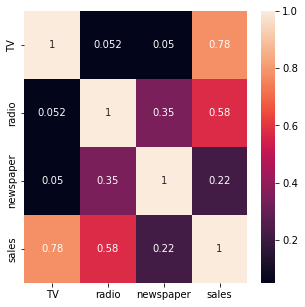

In [39]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

1] TV feature have no or very low correlation with other feature i.e radio 0.052 and newspaper 0.05 

2]    (a) Radio feature has no correltion 0.052 with TV feature. 
   
    (b) Radio feature have corre;ation of 0.35 with newspaper.
    
3]    (a) newspaper feature has very low correlation 0.05 with tv feature .
   
    (b) newspaper have correlation 0.35 with radio feature.

* Feature VS Target correlation 

1] Tv feature has 0.78 correlation with sales

2] Radio feature has 0.58 correlation with sales

3] newspaper feature has 0.22 correlation with sales


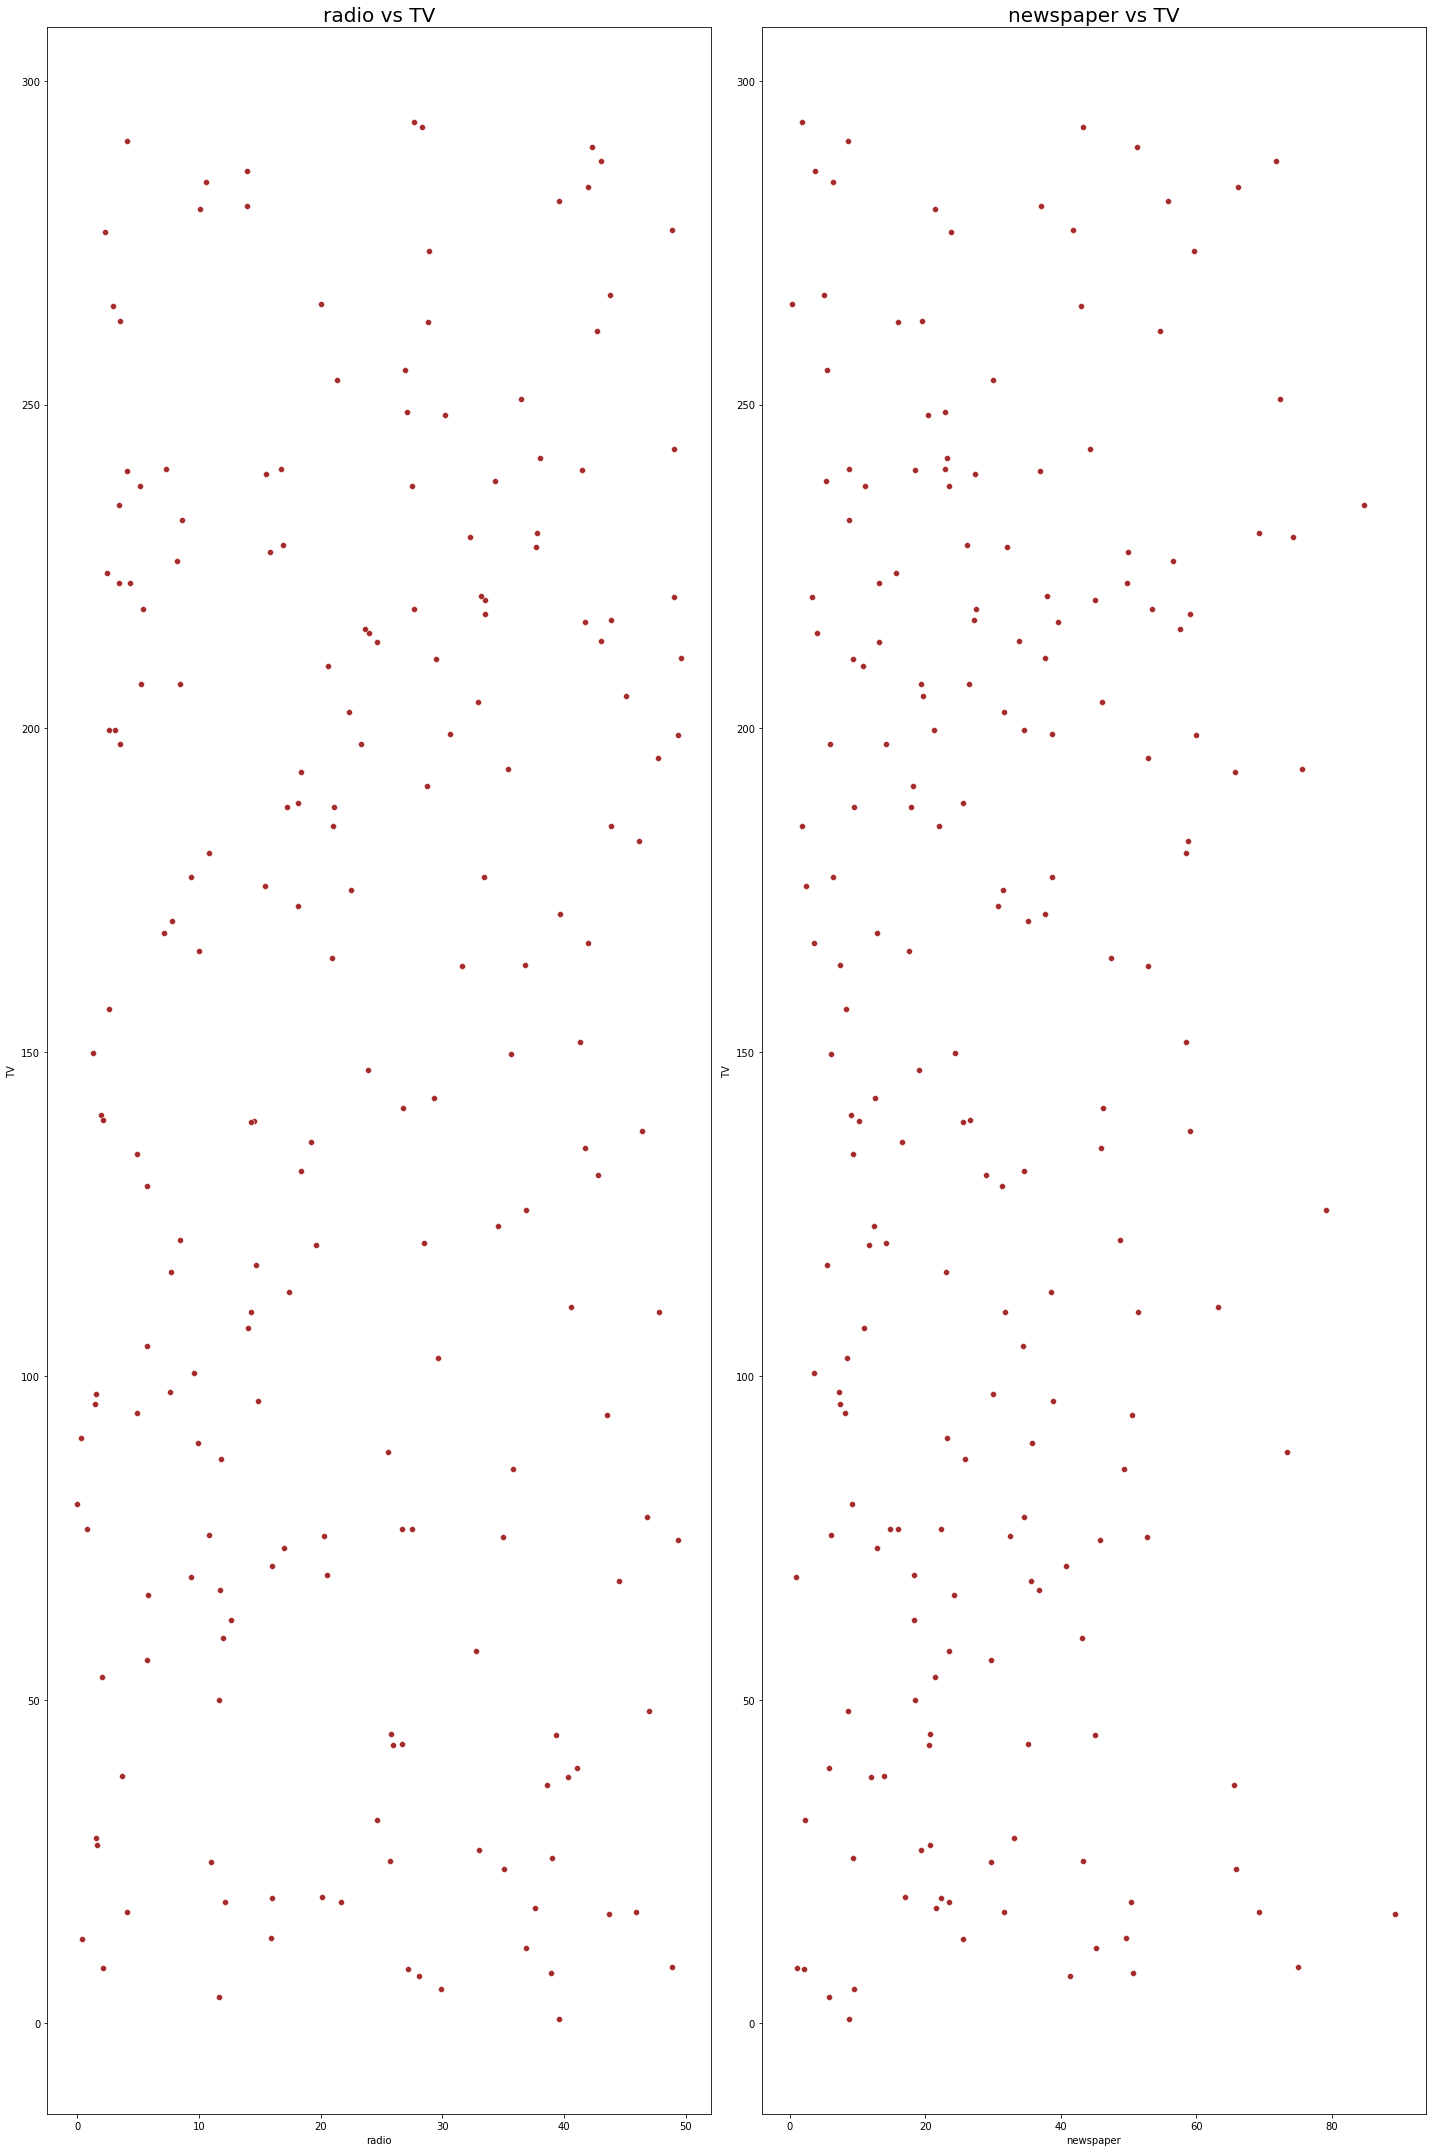

In [40]:
fig=plt.figure(figsize=(20,30))
j=1
for i in ["radio","newspaper"]:
    if j<=2:
        sns.scatterplot(x=df[i],y=df['TV'],data=df,color='brown',ax=fig.add_subplot(1,2,j))
        plt.title('{} vs TV'.format(i),fontsize=20)
        
    j+=1
plt.tight_layout()    

1] TV feature has no relationship with radio feature  as observed from graph

2] TV feature has no relationship with newspaper feature as observed from graph

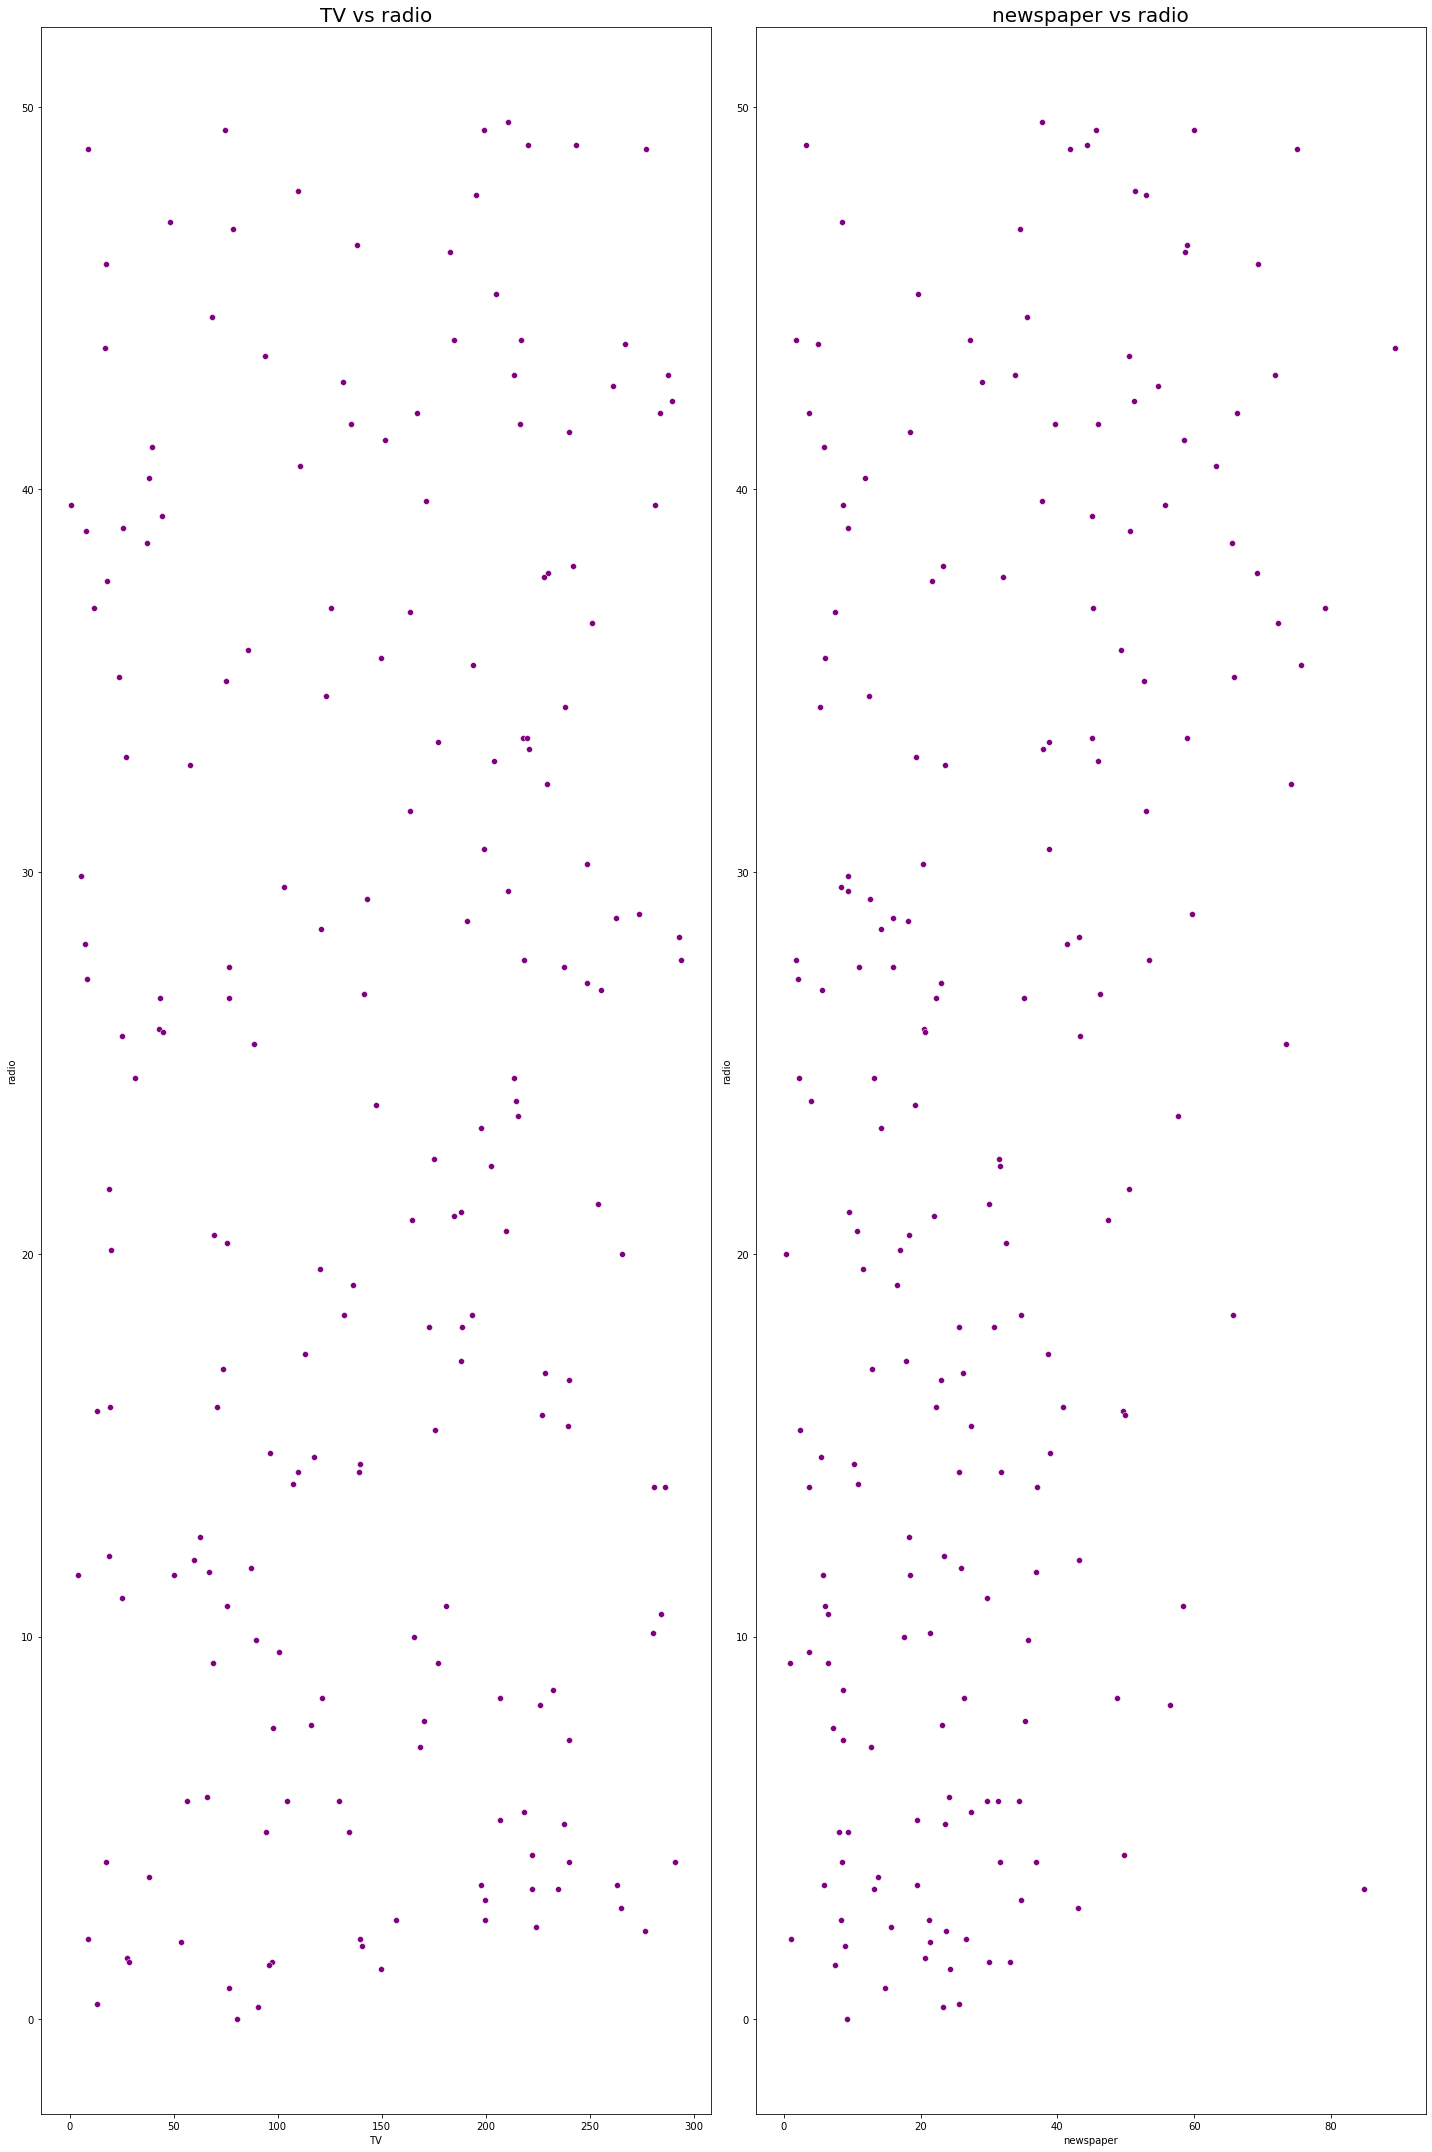

In [41]:
fig=plt.figure(figsize=(20,30))
j=1
for i in ["TV","newspaper"]:
    if j<=2:
        sns.scatterplot(x=df[i],y=df['radio'],data=df,color='purple',ax=fig.add_subplot(1,2,j))
        plt.title('{} vs radio'.format(i),fontsize=20)
        
    j+=1
plt.tight_layout()    

1] radio feature has no relationship with TV feature as observed from graph

2] radio feature has no relationship with newspaper feature as observed from graph

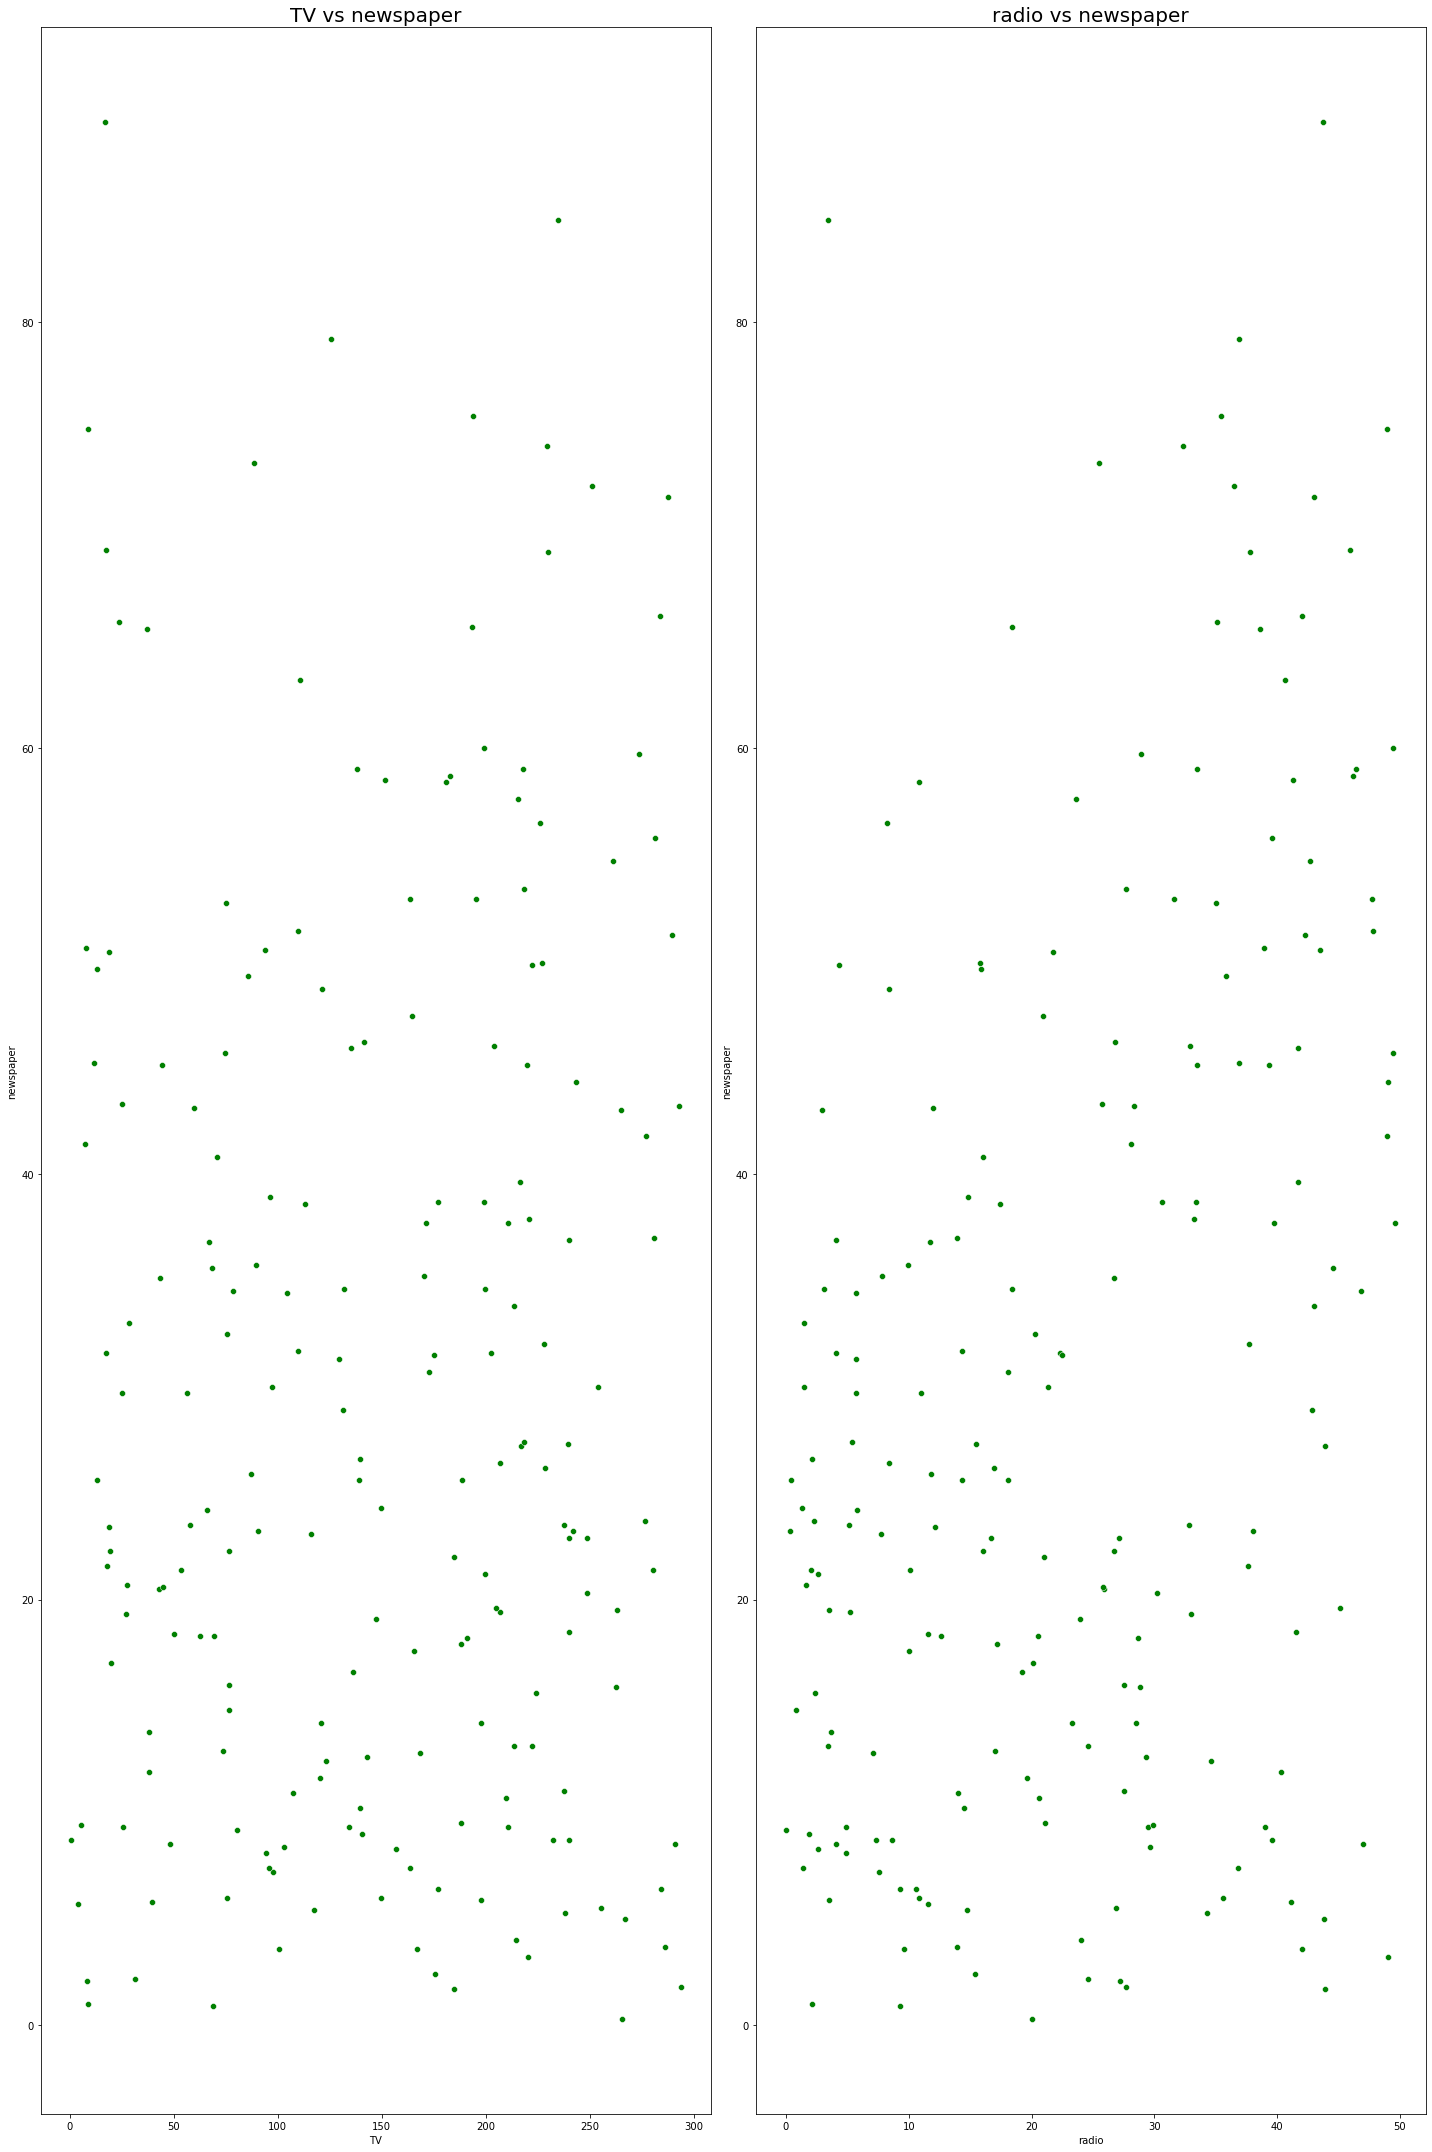

In [42]:
fig=plt.figure(figsize=(20,30))
j=1
for i in ["TV","radio"]:
    if j<=2:
        sns.scatterplot(x=df[i],y=df['newspaper'],data=df,color='green',ax=fig.add_subplot(1,2,j))
        plt.title('{} vs newspaper'.format(i),fontsize=20)
        
    j+=1
plt.tight_layout()    

1] newspaper feature has no relationship with TV feature as observed from graph

2] newspaper feature has no relationship with radio feature as observed from graph

* let's Analyse for transformation of  newspaper variable having skewness of 0.65 after removing outliers

* 1] skewness and distribution before transformation

In [43]:
df['newspaper'].skew()

0.650111551724088

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

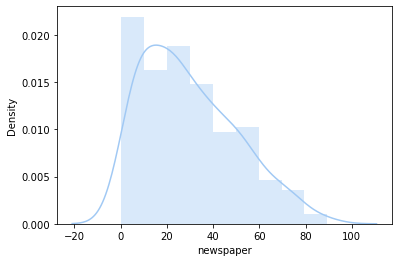

In [44]:
sns.distplot(df['newspaper'])

* skewness and distribution after transformation.

In [45]:
from sklearn.preprocessing import PowerTransformer
ptr1=PowerTransformer(method="yeo-johnson")
trans1=ptr1.fit_transform(df[['newspaper']])

In [46]:
pd.DataFrame(trans1).skew()

0   -0.101288
dtype: float64

In [47]:
from sklearn.preprocessing import PowerTransformer
ptr2=PowerTransformer(method="box-cox")
trans2=ptr2.fit_transform(df[['newspaper']])

In [48]:
pd.DataFrame(trans2).skew()

0   -0.117312
dtype: float64

<AxesSubplot:ylabel='Density'>

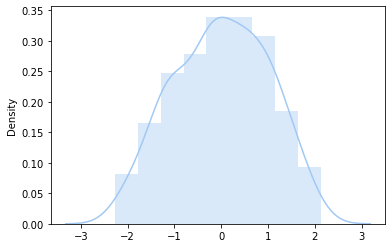

In [49]:
sns.distplot(trans1)

<AxesSubplot:ylabel='Density'>

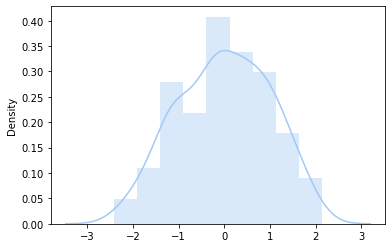

In [50]:
sns.distplot(trans2)

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

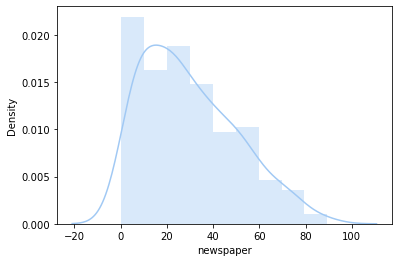

In [51]:
sns.distplot(df['newspaper'])

# AS observation from above analysis  we will go thruogh powertransformation with yeo-johnson

In [52]:
from sklearn.preprocessing import PowerTransformer
ptr1=PowerTransformer(method="yeo-johnson")
df['newspaper']=ptr1.fit_transform(df[['newspaper']])

In [53]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

<AxesSubplot:>

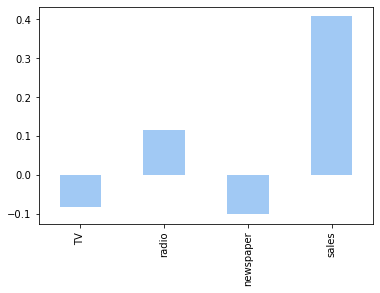

In [54]:
df.skew().plot(kind='bar')

* Sales variable is target hence we will not remove skewness and will not make any change in target variable .

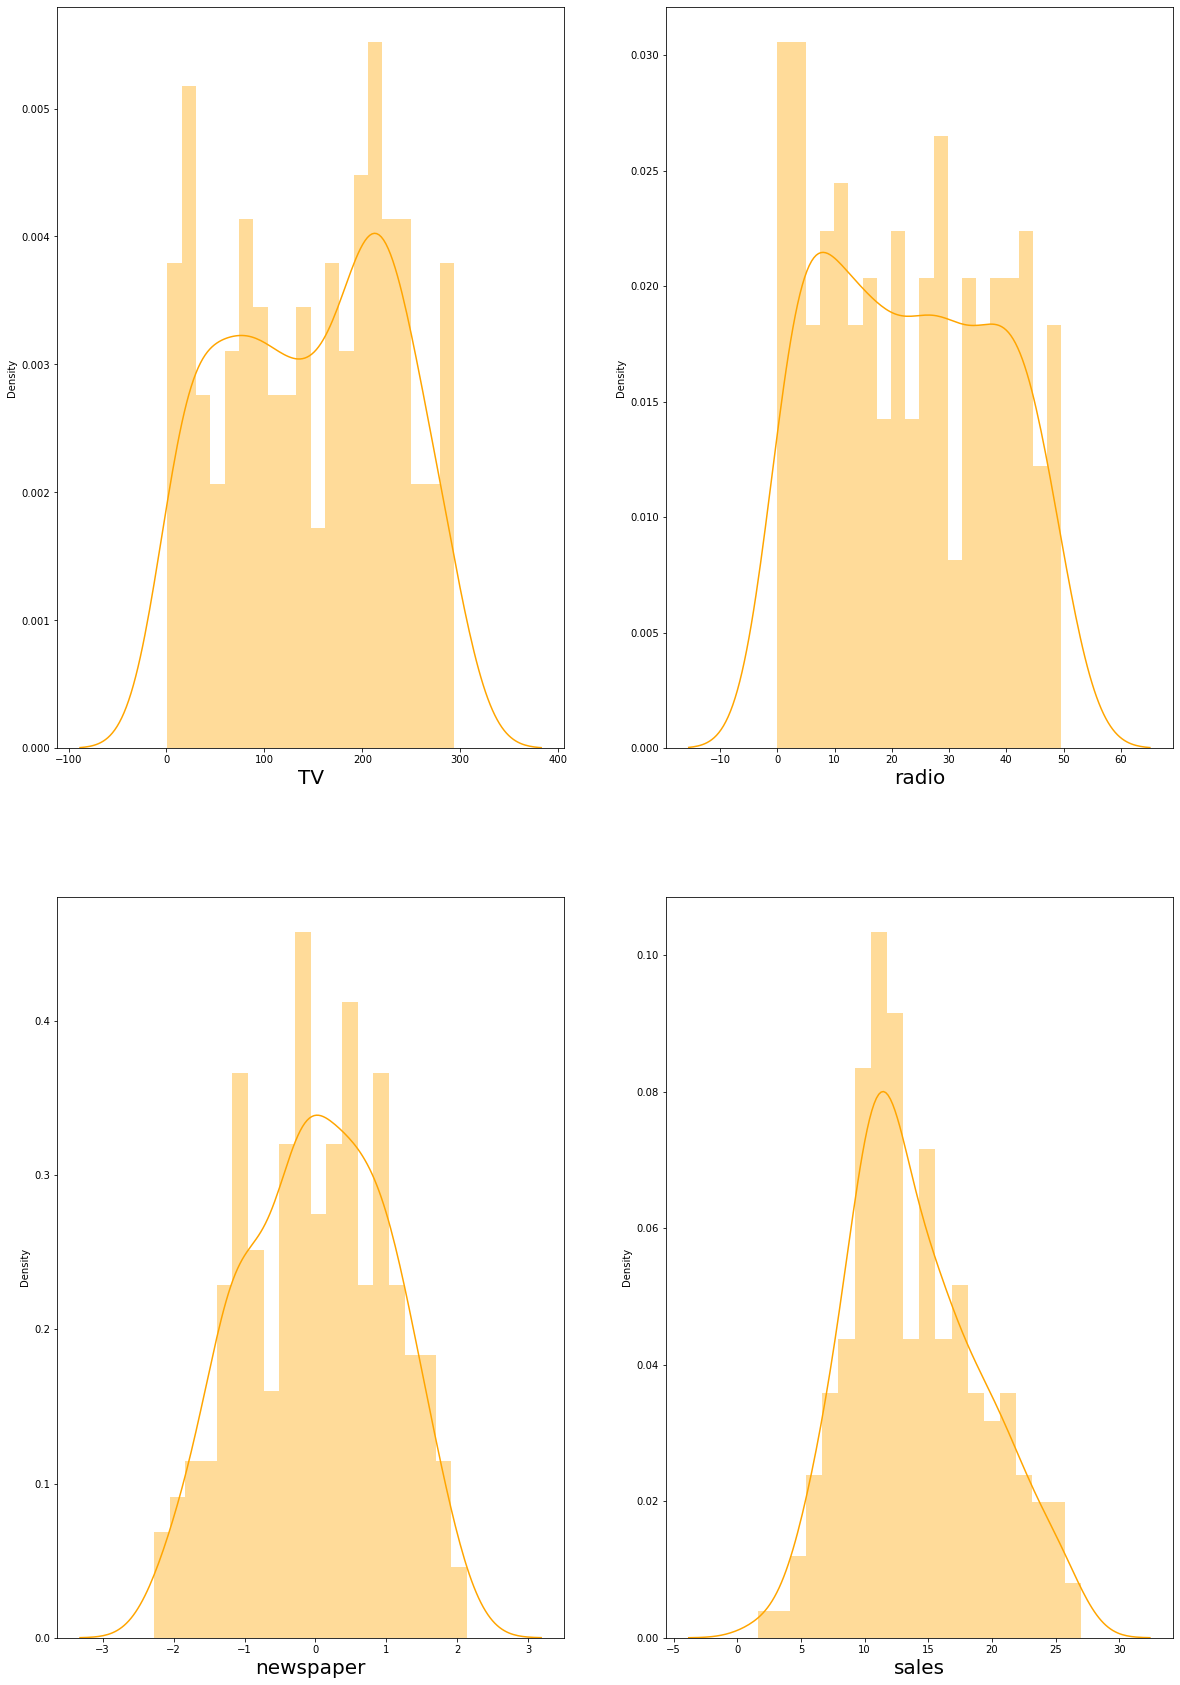

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in df.columns:
    if graph<=4:
        ax=plt.subplot(2,2,graph)
        sns.distplot(df[column],bins=20,kde=True,color='orange')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

* Splitting data into feature and target variable .

In [56]:
x=df[feat]
y=df.sales

* feature scaling with Standard scaler 


In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [58]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score 
from sklearn.model_selection import cross_val_score

In [59]:



maxR2=0
maxRn=0
for i  in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    regr=LinearRegression()
    regr.fit(x_train,y_train)
    r2=regr.score(x_test,y_test)
    print("R squared ",r2,'Random sate ',i)
    
    if r2>maxR2:
        maxR2=r2
        maxRn=i
        print("R-squared",maxR2,"random_state",i)
        

R squared  0.9019418610387823 Random sate  1
R-squared 0.9019418610387823 random_state 1
R squared  0.8428563448720281 Random sate  2
R squared  0.9146486444638249 Random sate  3
R-squared 0.9146486444638249 random_state 3
R squared  0.8624388771694563 Random sate  4
R squared  0.8663955433677717 Random sate  5
R squared  0.8937464131842972 Random sate  6
R squared  0.9022239331717868 Random sate  7
R squared  0.8682834338932628 Random sate  8
R squared  0.9190778368064777 Random sate  9
R-squared 0.9190778368064777 random_state 9
R squared  0.7951243532869718 Random sate  10
R squared  0.9297651776596159 Random sate  11
R-squared 0.9297651776596159 random_state 11
R squared  0.8996948071429309 Random sate  12
R squared  0.8564223611183933 Random sate  13
R squared  0.9109324708837373 Random sate  14
R squared  0.8884224816568612 Random sate  15
R squared  0.8983749199754394 Random sate  16
R squared  0.9187817335880795 Random sate  17
R squared  0.8536501914693524 Random sate  18
R sq

In [60]:
print("Maximum R squared obtained  is ",maxR2,'at random state',maxRn) 

Maximum R squared obtained  is  0.9440953301664557 at random state 90


# Training model with random state of 90

In [61]:
 x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=90)

In [62]:
x_train.shape

(148, 3)

In [63]:
y_train.shape

(148,)

In [64]:
def Reg_eval(regr,x_train,y_train,x_test,y_test,train=True):
    if train==True:
        print('********** Training Evaluation *******************')
        ytrain_pred=regr.predict(x_train)
        
        R2_train=r2_score(y_train,ytrain_pred)
       
        RMSE_train=np.sqrt(mean_squared_error(y_train,ytrain_pred))
        print("\nThe R squared for {0}  for Train data  is {1} ".format(str(regr),R2_train))
        print("\nThe Root mean squared error for {0}  for Train data is {1} ".format(str(regr),RMSE_train))
        
        
        
    elif train==False:
        print('\n********** Testing  Evaluation *******************')
        ytest_pred=regr.predict(x_test)
        R2_test=r2_score(y_test,ytest_pred)
        RMSE_test=np.sqrt(mean_squared_error(y_test,ytest_pred))
        print(" \nThe R squared for {0}  for Test data is {1} ".format(str(regr),R2_test))
        print("\nThe Root mean squared error for {0}  Test data  is {1} ".format(str(regr),RMSE_test))

def Reg_plot(regr,x_test,y_test):
    y_pred_test=regr.predict(x_test)
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=y_test,y=y_pred_test)
    plt.plot(y_test,y_test,color='red')
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted sales")
    plt.title("{} Prediction VS Actual data".format(type(regr)))
    plt.show()

# Linear Regression

In [65]:
LinR1=LinearRegression()
LinR1.fit(x_train,y_train)

Reg_eval(LinR1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(LinR1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for LinearRegression()  for Train data  is 0.8769037990171266 

The Root mean squared error for LinearRegression()  for Train data is 1.8094556247984763 

********** Testing  Evaluation *******************
 
The R squared for LinearRegression()  for Test data is 0.9440953301664557 

The Root mean squared error for LinearRegression()  Test data  is 1.2170922888649487 


# Support Vector Regressor

In [66]:
SVR1=SVR(gamma=0.1,C=1,kernel='rbf')
SVR1.fit(x_train,y_train)

Reg_eval(SVR1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(SVR1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for SVR(C=1, gamma=0.1)  for Train data  is 0.9140207354677553 

The Root mean squared error for SVR(C=1, gamma=0.1)  for Train data is 1.5122461060493646 

********** Testing  Evaluation *******************
 
The R squared for SVR(C=1, gamma=0.1)  for Test data is 0.9440156010806238 

The Root mean squared error for SVR(C=1, gamma=0.1)  Test data  is 1.2179598647102317 


# Lasso regression

In [67]:
las1=Lasso(alpha=0.1)
las1.fit(x_train,y_train)

Reg_eval(las1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(las1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for Lasso(alpha=0.1)  for Train data  is 0.8760321218605626 

The Root mean squared error for Lasso(alpha=0.1)  for Train data is 1.8158509428996426 

********** Testing  Evaluation *******************
 
The R squared for Lasso(alpha=0.1)  for Test data is 0.9409538701634568 

The Root mean squared error for Lasso(alpha=0.1)  Test data  is 1.2508210633629986 


In [68]:
# Ridege Regression

In [69]:
rid1=Ridge(alpha=0.1)
rid1.fit(x_train,y_train)

Reg_eval(rid1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(rid1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for Ridge(alpha=0.1)  for Train data  is 0.8769034242762204 

The Root mean squared error for Ridge(alpha=0.1)  for Train data is 1.8094583790529506 

********** Testing  Evaluation *******************
 
The R squared for Ridge(alpha=0.1)  for Test data is 0.9440029227178013 

The Root mean squared error for Ridge(alpha=0.1)  Test data  is 1.2180977679763354 


# GradientBoost regressor

In [70]:
gbdt1=GradientBoostingRegressor(loss='squared_error',learning_rate=0.1,criterion='friedman_mse',n_estimators=100)
gbdt1.fit(x_train,y_train)

Reg_eval(gbdt1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(gbdt1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for GradientBoostingRegressor()  for Train data  is 0.9988706574656303 

The Root mean squared error for GradientBoostingRegressor()  for Train data is 0.17331591911258543 

********** Testing  Evaluation *******************
 
The R squared for GradientBoostingRegressor()  for Test data is 0.9750881136649221 

The Root mean squared error for GradientBoostingRegressor()  Test data  is 0.8124614700015638 


In [71]:
xgr1=XGBRegressor(learning_rate=0.1,n_estimators=100)
xgr1.fit(x_train,y_train)

Reg_eval(xgr1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(xgr1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)  for Train data  is 0.9998685455066166 

The Root mean squared error for XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None

In [72]:
rf1=RandomForestRegressor(criterion='squared_error',min_samples_split=4,n_estimators=100)
rf1.fit(x_train,y_train)

Reg_eval(rf1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(rf1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for RandomForestRegressor(min_samples_split=4)  for Train data  is 0.9944473081590309 

The Root mean squared error for RandomForestRegressor(min_samples_split=4)  for Train data is 0.38430620619230094 

********** Testing  Evaluation *******************
 
The R squared for RandomForestRegressor(min_samples_split=4)  for Test data is 0.9767477365313488 

The Root mean squared error for RandomForestRegressor(min_samples_split=4)  Test data  is 0.7849320909713667 


# TRain test score in dataframe 

In [73]:
regressors=[LinR1,SVR1,las1,rid1,gbdt1,xgr1,rf1]
Names=['Linear Regressor','SVRegressor','Lasso Regressor','Ridge Regressor','GBDTRegressor',
       'XGBRegressor',"RandomForestRegressor"]

In [74]:
scores_train= []
scores_test=[]
rmse_scores=[]
for reg in regressors:
    ypred_train=reg.predict(x_train)
    ypred_test=reg.predict(x_test)
    trainsc = r2_score(y_train,ypred_train)
    testsc=r2_score(y_test,ypred_test)
    rmse=np.sqrt(mean_squared_error(y_test,ypred_test))
    
    scores_train.append(trainsc)
    scores_test.append(testsc)
    rmse_scores.append(rmse)

In [75]:
EvalDF=pd.DataFrame({'Regressor':Names,'Train R2 square':scores_train,'Test R2 square':scores_test,
                      'RMSE':rmse_scores})
EvalDF

,Regressor,Train R2 square,Test R2 square,RMSE
0,Linear Regressor,0.876904,0.944095,1.217092
1,SVRegressor,0.914021,0.944016,1.217960
2,Lasso Regressor,0.876032,0.940954,1.250821
3,Ridge Regressor,0.876903,0.944003,1.218098
4,GBDTRegressor,0.998871,0.975088,0.812461
5,XGBRegressor,0.999869,0.971820,0.864108
6,RandomForestRegressor,0.994447,0.976748,0.784932


# Finding best  cv parameter with for loop on linear regression

In [76]:
for i in [3,5,7,8,10]:
    cv=cross_val_score(LinearRegression(),x_scaled,y,cv=i,scoring='r2')
    print("R2 square is {0} for cv={1}".format(cv.mean(),i))

R2 square is 0.8889468162619828 for cv=3
R2 square is 0.8857739370001966 for cv=5
R2 square is 0.8840746377370332 for cv=7
R2 square is 0.8883016789456263 for cv=8
R2 square is 0.8855693121179422 for cv=10


* Selecting cv =7 where score having most generalized result. 

# cross validation with for loop

In [77]:
from sklearn.model_selection import cross_val_score
cv_scores_mean=[]
cv_scores=[]
for reg in regressors:
    scr=cross_val_score(reg,x_scaled,y,cv=7,scoring="r2")
    cv_scores.append(scr)   
    cv_scores_mean.append(scr.mean())
cv_scores_mean   

[0.8840746377370332,
 0.920873169622007,
 0.8844754262766804,
 0.8840784893235598,
 0.9771074380481917,
 0.9751644617987526,
 0.9753390375811744]

In [78]:
EvalDF['Validation score']=cv_scores_mean

In [79]:
EvalDF

,Regressor,Train R2 square,Test R2 square,RMSE,Validation score
0,Linear Regressor,0.876904,0.944095,1.217092,0.884075
1,SVRegressor,0.914021,0.944016,1.217960,0.920873
2,Lasso Regressor,0.876032,0.940954,1.250821,0.884475
3,Ridge Regressor,0.876903,0.944003,1.218098,0.884078
4,GBDTRegressor,0.998871,0.975088,0.812461,0.977107
5,XGBRegressor,0.999869,0.971820,0.864108,0.975164
6,RandomForestRegressor,0.994447,0.976748,0.784932,0.975339


* Hyperparameter tunning on RandomForestRegressor

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
params={'criterion' : ["squared_error", "absolute_error", "poisson"],
                     'max_depth' :[4,5,6],
                      'min_samples_split' :[10,12,15], 
                     'min_samples_leaf' :[4,6,8,9],
                     'bootstrap':['True'],
                      'oob_score':['True'],
                     'max_samples' : [0.7,0.8],
                      }
Rf2=RandomForestRegressor()

RFgrid2=GridSearchCV(Rf2,param_grid=params,cv=7)
RFgrid2.fit(x_train,y_train)  
      
print(RFgrid2.best_params_)      

{'bootstrap': 'True', 'criterion': 'squared_error', 'max_depth': 6, 'max_samples': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'oob_score': 'True'}


In [84]:
best_Rf=RFgrid2.best_estimator_.fit(x_train,y_train)
Reg_eval(best_Rf,x_train,y_train,x_test,y_test,train=True)
Reg_eval(best_Rf,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared for RandomForestRegressor(bootstrap='True', max_depth=6, max_samples=0.8,
                      min_samples_leaf=4, min_samples_split=10,
                      oob_score='True')  for Train data  is 0.9730442034448619 

The Root mean squared error for RandomForestRegressor(bootstrap='True', max_depth=6, max_samples=0.8,
                      min_samples_leaf=4, min_samples_split=10,
                      oob_score='True')  for Train data is 0.8467431597120721 

********** Testing  Evaluation *******************
 
The R squared for RandomForestRegressor(bootstrap='True', max_depth=6, max_samples=0.8,
                      min_samples_leaf=4, min_samples_split=10,
                      oob_score='True')  for Test data is 0.9554816755837503 

The Root mean squared error for RandomForestRegressor(bootstrap='True', max_depth=6, max_samples=0.8,
                      min_samples_leaf=4, min_samples_split=10,
                   

* Hyperparameter tunning with GBDT

param3={ 'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate':[0.1,0.001,0.01,0.5], 
    'criterion':['friedman_mse', 'squared_error', 'mse'],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1,2,3,4,5],
       'max_depth':[1,2,3,4,5]}
gbdt=GradientBoostingRegressor()
grid3=GridSearchCV(gbdt,param_grid=param3,cv=7)
grid3.fit(x_train,y_train)  

I wil finalize random forest regressor as final model with default parameter .


The final model is rf1=RandomForestRegressor(criterion='squared_error',min_samples_split=4,n_estimators=100) with R2 
on test data 0.9767 and Root mean square error of 0.7849.



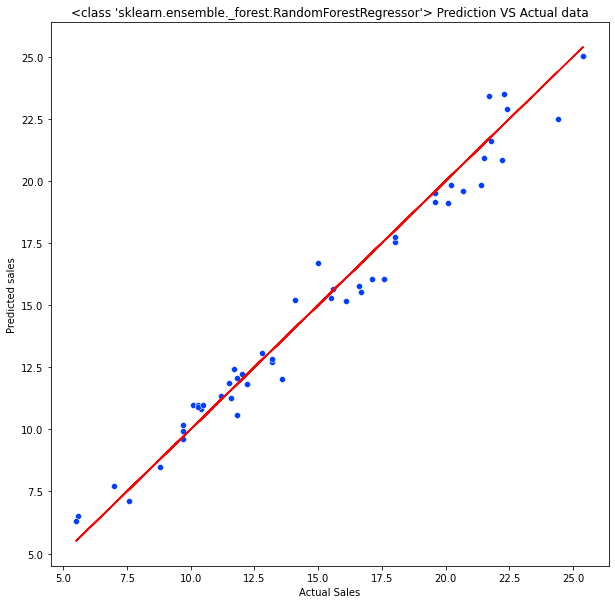

In [90]:
Reg_plot(rf1,x_test,y_test)

# saving model 


In [91]:
import pickle
filename='ChannelSalesRF'
pickle.dump(rf1,open(filename,'wb'))